In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
new_df = df.sample(30000, random_state=3)
new_df

,id,qid1,qid2,question1,question2,is_duplicate
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0
...,...,...,...,...,...,...
103388,103388,170897,170898,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?,0
73661,73661,10566,16017,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1
381211,381211,512921,215783,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?,0
45063,45063,80799,80800,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...,1


In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.duplicated().sum()

0

0    19156
1    10844
Name: is_duplicate, dtype: int64
0    63.853333
1    36.146667
Name: is_duplicate, dtype: float64


<AxesSubplot:>

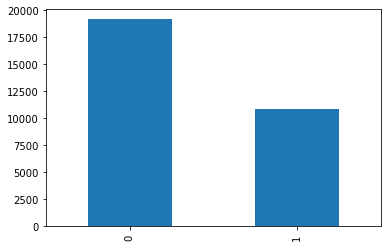

In [8]:
print(new_df['is_duplicate'].value_counts())
print(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count()*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 55484
Number of questions getting repeated 3378


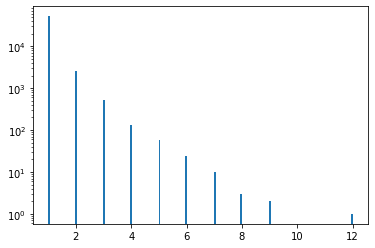

In [10]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [11]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [12]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1,62,39
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0,44,41
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1,16,24
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0,81,99
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0,42,28


In [13]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split()))
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1,62,39,13,8
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0,44,41,5,6
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1,16,24,4,6
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0,81,99,16,18
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0,42,28,8,6
...,...,...,...,...,...,...,...,...,...,...
103388,103388,170897,170898,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?,0,49,35,8,6
73661,73661,10566,16017,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1,133,125,22,22
381211,381211,512921,215783,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?,0,48,31,9,5
45063,45063,80799,80800,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...,1,51,60,9,10


In [14]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    return len(w1 & w2)

In [15]:
new_df['word_common'] = new_df.apply(common_words,axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1,62,39,13,8,3
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0,44,41,5,6,3
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1,16,24,4,6,3
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0,81,99,16,18,14
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0,42,28,8,6,5
...,...,...,...,...,...,...,...,...,...,...,...
103388,103388,170897,170898,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?,0,49,35,8,6,3
73661,73661,10566,16017,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1,133,125,22,22,16
381211,381211,512921,215783,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?,0,48,31,9,5,3
45063,45063,80799,80800,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...,1,51,60,9,10,5


In [16]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    return len(w1) + len(w2)    

In [17]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1,62,39,13,8,3,20
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0,44,41,5,6,3,11
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1,16,24,4,6,3,9
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0,81,99,16,18,14,34
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0,42,28,8,6,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...
103388,103388,170897,170898,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?,0,49,35,8,6,3,14
73661,73661,10566,16017,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1,133,125,22,22,16,38
381211,381211,512921,215783,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?,0,48,31,9,5,3,13
45063,45063,80799,80800,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...,1,51,60,9,10,5,19


In [18]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1,62,39,13,8,3,20,0.15
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0,44,41,5,6,3,11,0.27
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1,16,24,4,6,3,9,0.33
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0,81,99,16,18,14,34,0.41
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0,42,28,8,6,5,14,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103388,103388,170897,170898,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?,0,49,35,8,6,3,14,0.21
73661,73661,10566,16017,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1,133,125,22,22,16,38,0.42
381211,381211,512921,215783,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?,0,48,31,9,5,3,13,0.23
45063,45063,80799,80800,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...,1,51,60,9,10,5,19,0.26


Minimum characters 1
Maximum characters 430
Average number of characters 59


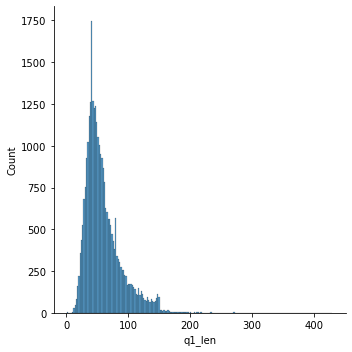

In [19]:
sns.displot(new_df['q1_len'])
print('Minimum characters', new_df['q1_len'].min())
print('Maximum characters', new_df['q1_len'].max())
print('Average number of characters', int(new_df['q1_len'].mean()))

Minimum characters 1
Maximum characters 1169
Average number of characters 60


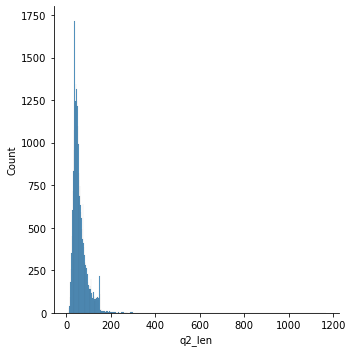

In [20]:
sns.displot(new_df['q2_len'])
print('Minimum characters', new_df['q2_len'].min())
print('Maximum characters', new_df['q2_len'].max())
print('Average number of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 80
average num of words 10


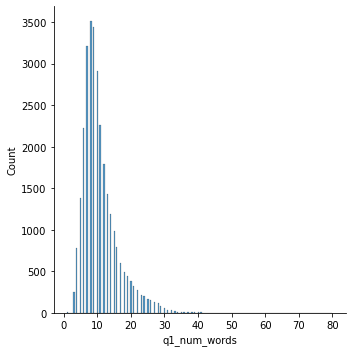

In [21]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


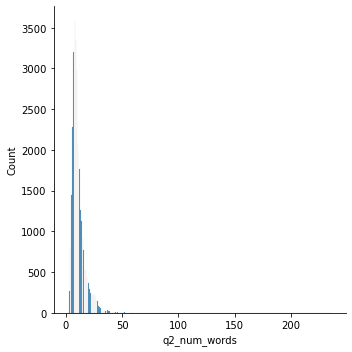

In [22]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

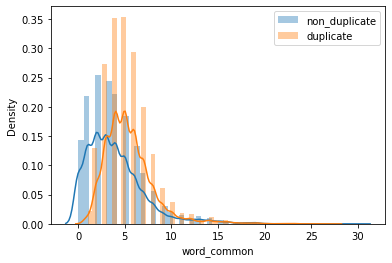

In [23]:
# Common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

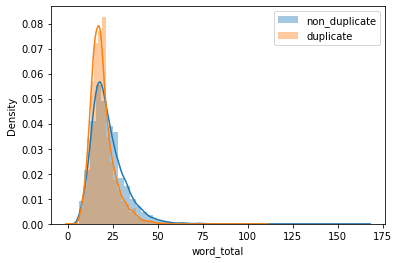

In [24]:
# Total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

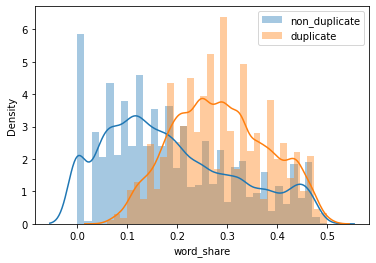

In [25]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [26]:
ques_df = new_df[['question1','question2']]
ques_df

,question1,question2
226565,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?
23936,Is introversion a disadvantaged personality?,Is introversion a good personality trait?
225231,What do fish do?,What do fish do all day?
201711,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...
115383,What is the future of Sears as e-commerce?,What is the future of Sears?
...,...,...
103388,How is Balarka technologies pvt limited in Delhi?,How is Yash Technologies Pvt. Ltd.?
73661,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...
381211,Do microwave ovens cause cancer? Why or why not?,Can microwave use cause cancer?
45063,Can science prove or disprove the existence of...,Does science have evidence for proving the exi...


In [27]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,1,62,39,13,8,3,20,0.15
23936,0,44,41,5,6,3,11,0.27
225231,1,16,24,4,6,3,9,0.33
201711,0,81,99,16,18,14,34,0.41
115383,0,42,28,8,6,5,14,0.36


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [29]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [30]:
final_dfl = pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,1,62,39,13,8,3,20,0.15
23936,0,44,41,5,6,3,11,0.27
225231,1,16,24,4,6,3,9,0.33
201711,0,81,99,16,18,14,34,0.41
115383,0,42,28,8,6,5,14,0.36


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6801666666666667

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7026666666666667